In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

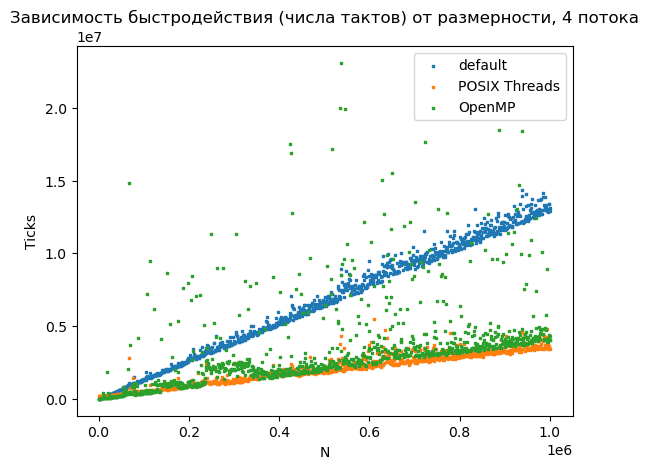

In [20]:
p4k = np.genfromtxt('proc4_k.csv', delimiter=',', dtype=np.int32)

plt.title('Зависимость быстродействия (числа тактов) от размерности, 4 потока')
plt.xlabel('N')
plt.ylabel('Ticks')

plt.scatter(p4k[:, 1], p4k[:, 2], marker='s', s=1, label='default')
plt.scatter(p4k[:, 1], p4k[:, 3], marker='s', s=1, label='POSIX Threads')
plt.scatter(p4k[:, 1], p4k[:, 4], marker='s', s=1, label='OpenMP')
plt.legend()

plt.show()

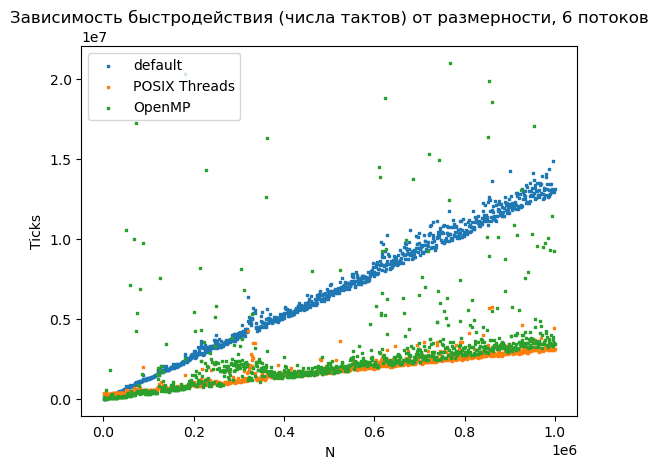

In [38]:
p6k = np.genfromtxt('proc6_k.csv', delimiter=',', dtype=np.int32)

plt.title('Зависимость быстродействия (числа тактов) от размерности, 6 потоков')
plt.xlabel('N')
plt.ylabel('Ticks')

plt.scatter(p6k[:, 1], p6k[:, 2], marker='s', s=1, label='default')
plt.scatter(p6k[:, 1], p6k[:, 3], marker='s', s=1, label='POSIX Threads')
plt.scatter(p6k[:, 1], p6k[:, 4], marker='s', s=1, label='OpenMP')
plt.legend()

plt.show()

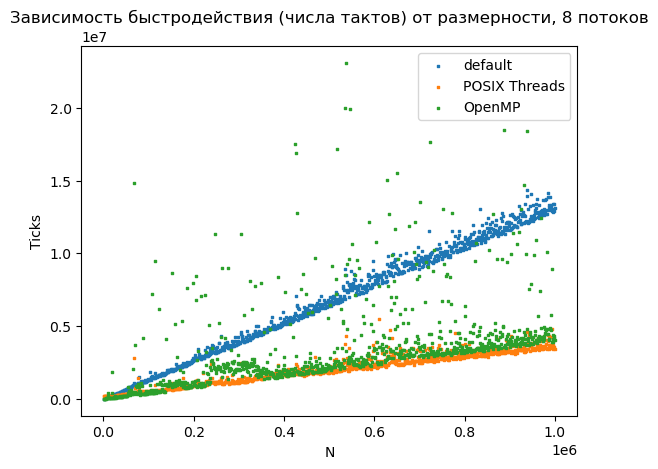

In [25]:
p8k = np.genfromtxt('proc4_k.csv', delimiter=',', dtype=np.int32)

plt.title('Зависимость быстродействия (числа тактов) от размерности, 8 потоков')
plt.xlabel('N')
plt.ylabel('Ticks')

plt.scatter(p8k[:, 1], p8k[:, 2], marker='s', s=1, label='default')
plt.scatter(p8k[:, 1], p8k[:, 3], marker='s', s=1, label='POSIX Threads')
plt.scatter(p8k[:, 1], p8k[:, 4], marker='s', s=1, label='OpenMP')
plt.legend()

plt.show()

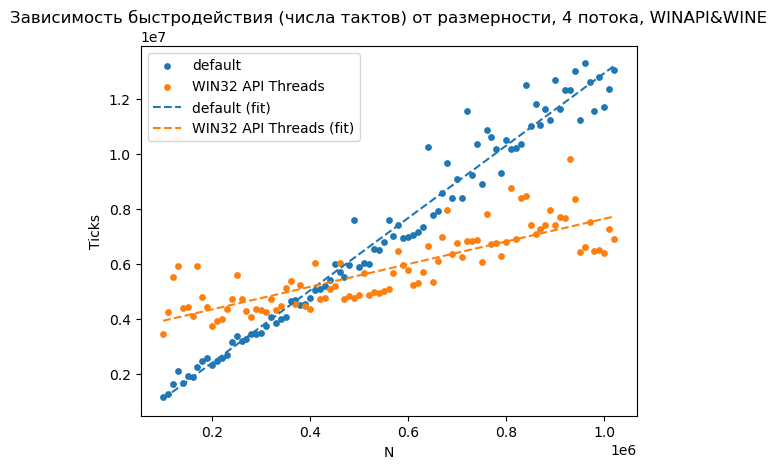

In [80]:
p4kw = np.genfromtxt('proc4_win.csv', delimiter=',', dtype=np.int32)

plt.title('Зависимость быстродействия (числа тактов) от размерности, 4 потока, WINAPI&WINE')
plt.xlabel('N')
plt.ylabel('Ticks')

fitter_0 = np.polyfit(p4kw[:, 1], p4kw[:, 2], 1)
fit_0 = np.poly1d(fitter_0)

fitter_1 = np.polyfit(p4kw[:, 1], p4kw[:, 3], 1)
fit_1 = np.poly1d(fitter_1)
# fitter_2 = np.polyfit(p4kw[:, 0], p4kw[:, 4], 1)
# fit_2 = np.poly1d(fitter_2)

plt.scatter(p4kw[:, 1], p4kw[:, 2], marker='o', s=15, label='default')
plt.scatter(p4kw[:, 1], p4kw[:, 3], marker='o', s=15, label='WIN32 API Threads')
# plt.scatter(p4kw[:, 1], p4kw[:, 4], marker='s', s=15, label='OpenMP')

plt.plot(p4kw[:, 1], fit_0(p4kw[:, 1]), linestyle='--', label='default (fit)')
plt.plot(p4kw[:, 1], fit_1(p4kw[:, 1]), linestyle='--', label='WIN32 API Threads (fit)')
# plt.plot(p4kw[:, 0], fit_2(p4kw[:, 0]), linestyle='--', label='OpenMP (fit)')


plt.legend()

plt.show()

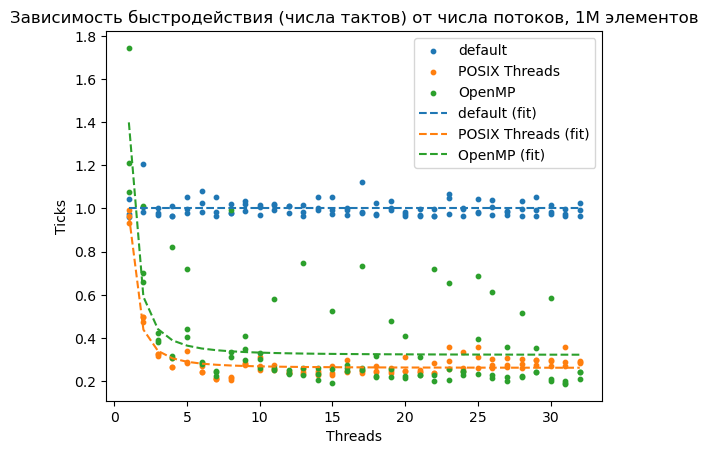

In [108]:
s1m = np.genfromtxt('size_1M.csv', delimiter=',', dtype=np.int32)

plt.title('Зависимость быстродействия (числа тактов) от числа потоков, 1M элементов')
plt.xlabel('Threads')
plt.ylabel('Ticks')
# plt.yscale('log', base=2)


def func(x,a,b):
    return b-a/(x*x)

fitter_0 = np.polyfit(s1m[:, 0], s1m[:, 2]/np.average(s1m[:,2]), 0)
fit_0 = np.poly1d(fitter_0)
fit_1, _ = curve_fit(func, s1m[:, 0], s1m[:, 3]/np.average(s1m[:,2]))
fit_2, _ = curve_fit(func, s1m[:, 0], s1m[:, 4]/np.average(s1m[:,2]))

plt.scatter(s1m[:, 0], s1m[:, 2]/np.average(s1m[:,2]), s=10, label='default')
plt.scatter(s1m[:, 0], s1m[:, 3]/np.average(s1m[:,2]), s=10,label='POSIX Threads')
plt.scatter(s1m[:, 0], s1m[:, 4]/np.average(s1m[:,2]), s=10,label='OpenMP')

plt.plot(s1m[:, 0], fit_0(s1m[:, 0]), linestyle='--', label='default (fit)')
plt.plot(s1m[:, 0], func(s1m[:, 0], *fit_1), linestyle='--', label='POSIX Threads (fit)')
plt.plot(s1m[:, 0], func(s1m[:, 0], *fit_2), linestyle='--', label='OpenMP (fit)')

plt.legend(loc='upper right')

plt.show()